### Question 1:  Review the Titanic data(60)

In lecture 3, we use Titanic data as the example for data pre-processing. This dataset contains information about passengers on the Titanic, including features like age, gender, class, and whether they survived or not. Now we are going to fit this data to the three classification models we have discussed. 

In [1]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


1. Perform the pre-processing steps we have done in the lecture 3, including cleaning the missing values, convert the target (survived) to a categorical variable and split the training and testing data. (10)

In [2]:
# Find the rows that have missing data
row_with_missing = titanic_data[titanic_data.isnull().any(axis =1)]
row_with_missing

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [3]:
# Convert the 'deck' column to a string data type.
titanic_data['deck'] = titanic_data['deck'].astype(str)

# Replace the string 'nan' in the 'deck' column with 'Unknown'.
titanic_data['deck'] = titanic_data['deck'].replace('nan', 'Unknown')

# Find rows with missing values (NaN) in any column and store them in 'row_with_missing'.
row_with_missing = titanic_data[titanic_data.isnull().any(axis=1)]

# Remove the 'alive' column from the 'titanic_data' DataFrame.
titanic_data = titanic_data.drop('alive', axis=1)

# Drop rows with any missing values (NaN) from the 'titanic_data' DataFrame.
titanic_data = titanic_data.dropna()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Now only use the age and fare as the features, fit Naive bayes, LDA and QDA model. Report the classification table for each model. Which one performs the best? (20) 

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X = titanic_data[['age', 'fare']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Fit LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Fit QDA model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Compare accuracies
nb_accuracy = nb_model.score(X_test, y_test)
lda_accuracy = lda_model.score(X_test, y_test)
qda_accuracy = qda_model.score(X_test, y_test)

print("Naive Bayes accuracy: ", nb_accuracy)
print("LDA accuracy: ", lda_accuracy)
print("QDA accuracy: ", qda_accuracy)

Naive Bayes accuracy:  0.6293706293706294
LDA accuracy:  0.6223776223776224
QDA accuracy:  0.6153846153846154


In [6]:
from sklearn.metrics import classification_report

nb_predictions = nb_model.predict(X_test)
report = classification_report(y_test, nb_predictions, 
                               target_names=['Not Survived', 'Survived'])
print("Classification Report for Naive Bayes:\n", report)

lda_predictions = lda_model.predict(X_test)
report = classification_report(y_test, lda_predictions, 
                               target_names=['Not Survived', 'Survived'])
print("Classification Report for LDA:\n", report)

qda_predictions = qda_model.predict(X_test)
report = classification_report(y_test, qda_predictions, 
                               target_names=['Not Survived', 'Survived'])
print("Classification Report for QDA:\n", report)

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

Not Survived       0.62      0.89      0.73        80
    Survived       0.68      0.30      0.42        63

    accuracy                           0.63       143
   macro avg       0.65      0.59      0.57       143
weighted avg       0.64      0.63      0.59       143

Classification Report for LDA:
               precision    recall  f1-score   support

Not Survived       0.61      0.89      0.72        80
    Survived       0.67      0.29      0.40        63

    accuracy                           0.62       143
   macro avg       0.64      0.59      0.56       143
weighted avg       0.64      0.62      0.58       143

Classification Report for QDA:
               precision    recall  f1-score   support

Not Survived       0.61      0.89      0.72        80
    Survived       0.65      0.27      0.38        63

    accuracy                           0.62       143
   macro avg       0.63 

All three models performs very similarly. Naive Bayes performs slightly the best with a accuracy of 0.629 while QDA and LDA performs only very slightly worse with f1 scores of 0.615 and 0.622 respectively. Naive Bayes does have the highest accuracy. Overall, it is hard to say which model is exactly better, but Naive Bayes probably has a slight edge.

3. Make a data visualization to show the decision boundary for three models. (20)

In [7]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X['age'].min() - 0.5, X['age'].max() + 0.5
y_min, y_max = X['fare'].min() - 0.5, X['fare'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 10))

# Make predictions on the meshgrid points for each model
nb_pred = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
lda_pred = lda_model.predict(np.c_[xx.ravel(), yy.ravel()])
qda_pred = qda_model.predict(np.c_[xx.ravel(), yy.ravel()])

nb_pred = nb_pred.reshape(xx.shape)
lda_pred = lda_pred.reshape(xx.shape)
qda_pred = qda_pred.reshape(xx.shape)

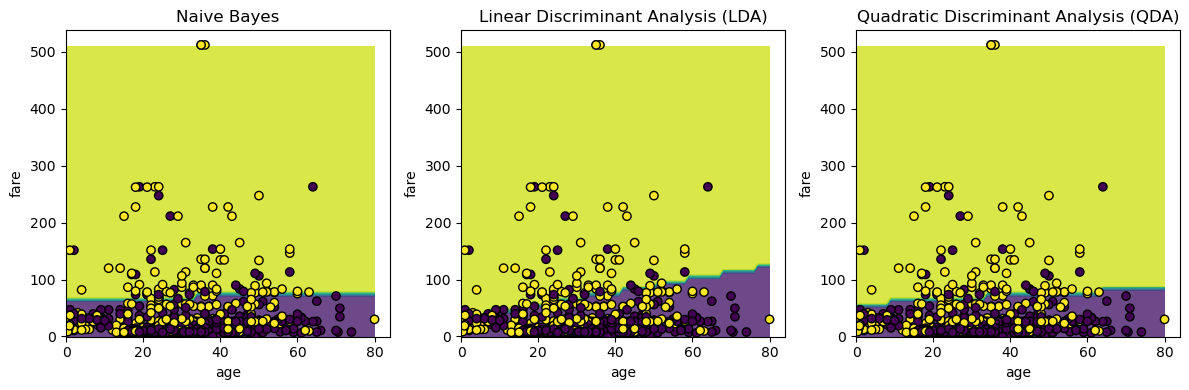

In [8]:
# Plot the decision boundaries
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.contourf(xx, yy, nb_pred, alpha=0.8)
plt.scatter(X['age'], X['fare'], c=y, edgecolors='k')
plt.xlabel('age')
plt.ylabel('fare')
plt.title('Naive Bayes')

plt.subplot(1, 3, 2)
plt.contourf(xx, yy, lda_pred, alpha=0.8)
plt.scatter(X['age'], X['fare'], c=y, edgecolors='k')
plt.xlabel('age')
plt.ylabel('fare')
plt.title('Linear Discriminant Analysis (LDA)')

plt.subplot(1, 3, 3)
plt.contourf(xx, yy, qda_pred, alpha=0.8)
plt.scatter(X['age'], X['fare'], c=y, edgecolors='k')
plt.xlabel('age')
plt.ylabel('fare')
plt.title('Quadratic Discriminant Analysis (QDA)')

plt.tight_layout()
plt.show()

4. Now fit the models again with all variables. Make sure you have convert the categorical variables to factors. Report the classification table for each models. Which one performs the best? (20)

In [9]:
titanic_data = pd.get_dummies(titanic_data, columns=['pclass', 'sex', 'embarked', 
                                                     'class', 'who', 'adult_male',
                                                     'deck', 'embark_town', 'alone'])

X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.2, random_state=83)

In [10]:
# Fit Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Fit LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Fit QDA model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Compare accuracies
nb_accuracy = nb_model.score(X_test, y_test)
lda_accuracy = lda_model.score(X_test, y_test)
qda_accuracy = qda_model.score(X_test, y_test)

print("Naive Bayes accuracy: ", nb_accuracy)
print("LDA accuracy: ", lda_accuracy)
print("QDA accuracy: ", qda_accuracy)

Naive Bayes accuracy:  0.7202797202797203
LDA accuracy:  0.7552447552447552
QDA accuracy:  0.6923076923076923


In [11]:
nb_predictions = nb_model.predict(X_test)
report = classification_report(y_test, nb_predictions, 
                               target_names=['Not Survived', 'Survived'])
print("Classification Report for Naive Bayes:\n", report)

lda_predictions = lda_model.predict(X_test)
report = classification_report(y_test, lda_predictions, 
                               target_names=['Not Survived', 'Survived'])
print("Classification Report for LDA:\n", report)

qda_predictions = qda_model.predict(X_test)
report = classification_report(y_test, qda_predictions, 
                               target_names=['Not Survived', 'Survived'])
print("Classification Report for QDA:\n", report)

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

Not Survived       0.78      0.70      0.74        80
    Survived       0.66      0.75      0.70        63

    accuracy                           0.72       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.73      0.72      0.72       143

Classification Report for LDA:
               precision    recall  f1-score   support

Not Survived       0.75      0.84      0.79        80
    Survived       0.76      0.65      0.70        63

    accuracy                           0.76       143
   macro avg       0.76      0.74      0.75       143
weighted avg       0.76      0.76      0.75       143

Classification Report for QDA:
               precision    recall  f1-score   support

Not Survived       0.66      0.95      0.78        80
    Survived       0.85      0.37      0.51        63

    accuracy                           0.69       143
   macro avg       0.75 

Naive and QDA peforms the worst in this case in terms of accuracy. LDA performs much better than both of the other models in terms of accuracy. So, I would choose LDA over the other two models in this case because it is a more accurate.

### Question 2: Simulation study (10)

In the following simulation study, please write a sentence to discuss what this simulation code is doing and what you have seen in the figure.  

In [12]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(4400)

# Define the range of dataset sizes
noises = np.arange(0,1,0.05)

# Initialize lists to store accuracy and time results
accuracy_nb = []
accuracy_lda = []
accuracy_qda = []

In [13]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

for noise in noises:
    
    # Generate a random classification dataset
    X1 = np.random.normal(5, 1, 1000)
    X2 = np.random.normal(0, 1, 1000)
    X3 = np.random.normal(2, 1, 1000)
    X4 = np.random.normal(-3, 2, 1000)
    X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})
    y = np.where(X1 > 5, 'group1', 'group2')

    indices_to_change = np.random.choice(1000, 
                                         size=int(noise * 1000), 
                                         replace=False)

    for index in indices_to_change:
        if y[index] == 'group1':
            y[index] = 'group2'
        else:
            y[index] = 'group1'

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=4400)

    # Fit Naive Bayes model and calculate accuracy and time
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    accuracy_nb.append(nb_model.score(X_test, y_test))

    # Fit LDA model and calculate accuracy and time
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_train, y_train)
    accuracy_lda.append(lda_model.score(X_test, y_test))
    
    # Fit QDA model and calculate accuracy and time
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(X_train, y_train)
    accuracy_qda.append(qda_model.score(X_test, y_test))    

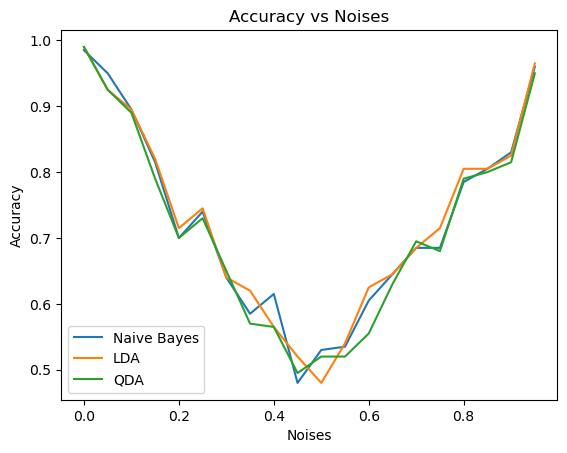

In [14]:
import matplotlib.pyplot as plt

plt.plot(noises, accuracy_nb, label='Naive Bayes')
plt.plot(noises, accuracy_lda, label='LDA')
plt.plot(noises, accuracy_qda, label='QDA')
plt.xlabel('Noises')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Noises')
plt.legend()
plt.show()

This simulation study appears to be conducting a study to assess the performance of three different classification models (Naive Bayes, Linear Discriminant Analysis, and Quadratic Discriminant Analysis) on a synthetic dataset with varying levels of noise. The noise is introduced by flipping the labels of a random subset of instances, causing misclassification in the dataset.

From the graph, we see that as the level of noise in the dataset increases, the classification accuracy of all three models (Naive Bayes, LDA, and QDA) decreases. This demonstrates that the introduced noise negatively impacts the models' performance, making it harder for them to correctly classify the data. 

The simulation is evaluating the robustness of these classification models to noisy data, and the figure illustrates the impact of noise on their accuracy. From the figure, it seems like all three models are acting similarly. It does seem like LDA predicts a little better than the other two models as noise increases.

### Question 3: Compare the models (20)

Please summarize the similarity and difference between Naive Bayes, LDA and QDA. Wirte at least three similarities between the models and at least two difference for each model. Hint: think about the how the models are proposed, the assumptions and the decision boundary etc.

## Similarities:

    i) Naive Bayes, LDA, and QDA are all classification algorithims used to make predictions based on input features. All three are cosnidered supervised learning techniques.

    ii) Probabilistic models: making use of probability distributions to estimate class membership probabilities.

    iii) Classification based on posterior probabilities.  After estimating the probability distributions, these algorithms calculate the posterior probability of each class given the input features using Bayes' theorem. The class with the highest posterior probability is assigned as the predicted class label.



## Differences:

### Naive Bayes

1) Independence assumption: assumes that features are conditionally independent given the class label even though that may not be true in the real world, but it does simiplify the model. The model is very simple, fast, and easy to implement.
    
2) Simple Model: Computationally efficient and requires less training data. No assumption for the decision boundary (but usually a simple one close to linear)


### Linear Discriminant Analysis

1) Assumption of Equal Covariance Matrices: LDA assumes that all classes share the same covariance matrix. This simplifies the model but may not hold if the classes have different covariance structures.

2) Linear Decision Boundary: LDA aims to find a linear decision boundary that maximizes the separability between classes. It's well-suited for problems with linearly separable classes.
    
    
    
### Quadratic Discriminant Analysis

1) Relaxation of Covariance Assumption and Higher Model Complexity: QDA relaxes the equal covariance matrix assumption by allowing each class to have its own covariance matrix. This makes it more flexible but requires more parameters. Potentially higher model complexity (overfitting).

2) Non-Linear Decision Boundary (Quadratic): QDA can capture non-linear decision boundaries which makes it more powerful in cases where classes are not linearly separable. It is a more flexible model however may require more data to estimate the covariance matrices accurately. Maximizes separation between classes and minimizes within-class variance.
